# <center><font color='green'>MHealth DNN Manuel</font></center>

# <font color='blue'>Importing dataset</font>

In [1]:
import pandas as pd
dataset = pd.read_csv("dataset/dataset_filtered.csv",header=None)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,...,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000
mean,-7.485271,-0.140923,-0.938418,0.003649,-0.008048,1.805184,-9.061487,-0.701985,0.101167,-0.549942,...,-3.448201,-5.781446,2.381165,-0.201574,-0.410515,0.380693,-0.532629,1.422140,0.030670,6.169021
std,5.701949,2.799380,4.611164,0.839074,0.857724,4.214175,5.200389,6.457622,0.458913,0.434721,...,5.891595,6.578371,4.177971,0.549524,0.546359,0.515658,34.216257,30.285262,82.663004,3.298902
min,-22.438000,-20.188000,-18.401000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,-1.779200,-2.660400,...,-22.345000,-18.972000,-18.238000,-1.170600,-2.256700,-1.114200,-319.030000,-358.130000,-702.570000,1.000000
25%,-9.707100,-1.294300,-3.686550,-0.213500,-0.171640,0.159875,-10.063000,-3.494350,-0.345080,-0.810510,...,-5.013900,-9.558100,0.139070,-0.682350,-0.831620,-0.040948,-6.228350,-7.272000,-12.170000,3.000000
50%,-8.800300,-0.292570,-0.881070,-0.071167,-0.046049,1.372500,-9.597700,0.340070,0.204080,-0.688560,...,-2.480000,-7.738900,1.819100,-0.300000,-0.597540,0.448280,0.360740,0.353930,-0.709300,6.000000
75%,-5.117400,0.984775,1.092650,0.163270,0.138150,2.924450,-7.549800,1.819300,0.487940,-0.487800,...,-0.539050,-2.359550,5.324750,0.278430,-0.045175,0.840520,5.224000,8.350250,10.302500,9.000000
max,19.094000,20.927000,26.196000,8.506500,8.519100,20.024000,21.161000,25.015000,1.710600,1.752300,...,19.801000,21.965000,25.741000,1.415700,1.121100,1.528000,239.690000,335.250000,657.180000,12.000000


# <font color='blue'>Splitting the dataset into the Training set and Test set</font> 

In [2]:
from sklearn.cross_validation import train_test_split
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
y_test=y_test.reshape(len(y_test),1)

C:\Users\Hemanth kumar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
print("Total Number of instances: ",len(dataset))
print("Total Number of Training : ",len(X_train))
print("Total Number of Testing  : ",len(X_test))
print("Number of features       : ",len(X_train[0]))
print("Number of Target labels  : ",dataset[23].nunique())

Total Number of instances:  343195
Total Number of Training :  274556
Total Number of Testing  :  68639
Number of features       :  23
Number of Target labels  :  12


# <font color='blue'> One hot encoding the Target</font>

In [4]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
y_train1 = onehotencoder.fit_transform(y_train).toarray()
onehotencoder = OneHotEncoder(categorical_features = [0])
y_test1=onehotencoder.fit_transform(y_test).toarray()
y_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# <font color='blue'>Feature Scaling</font>

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <font color='blue'>Building the DNN model</font>

In [6]:
from DeepNetwork import DeepNetwork
X_train=X_train.T
X_test=X_test.T
y_train1=y_train1.T
y_test1=y_test1.T

# Training the model
n_x=len(X_train)
af=['tanh','sigmoid']
layer_dim=[n_x,100,50,12]
layer_size=len(layer_dim)

#Initializing Deep Network
MyNetwork=DeepNetwork(X_train,y_train)


Network Initialized..........

Number of Training samples :       274556
Number of Features :              23
Available Activations :
1.relu
2.tanh
3.sigmoid



# <font color='blue'>Training the DNN model</font>

In [7]:
import time

start = time.clock()
para,J_log=MyNetwork.network(X_train,y_train1,af,layer_dim,epoch=10,batch_size=25,alpha=0.5,plot=False)
end= time.clock()
elapsed = (end - start)
print("Elapsed time:\n",elapsed)



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :          ['tanh', 'sigmoid']
Alpha :                0.5
Batch Size :           25
Epochs :               10 



100% (10 of 10) |########################| Elapsed Time: 0:01:45 Time:  0:01:45


Elapsed time:
 107.92562637840629


# <font color='blue'>Plotting the analysis curve</font>

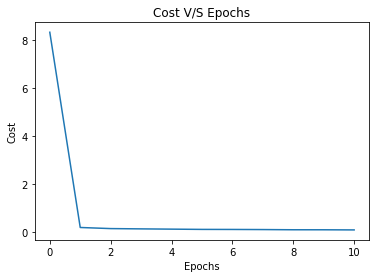

[23, 100, 50, 12]


In [8]:
import matplotlib.pyplot as plt
# Plotting cost v/s number of iterations
plt.title('Cost V/S Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(range(len(J_log)), J_log)
plt.show()
print(layer_dim)

# <font color='blue'>Making the predictions and evaluating the model</font>

In [9]:
# Predicting the Train set results
y_pred_train =[]
y_pred_train_decoded=[]
y_pred_train = MyNetwork.predict(X_train,layer_size,para,af)
print(y_pred_train.shape)
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_train_decoded = y_pred_train.T.dot(onehotencoder.active_features_).astype(int)
y_pred_train_decoded=y_pred_train_decoded.reshape(len(y_pred_train_decoded),1)

accuracy_train = accuracy_score(y_train,y_pred_train_decoded)

# Predicting the Test set results
y_pred_test =[]
y_pred_test_decoded=[]
y_pred_test = MyNetwork.predict(X_test,layer_size,para,af)

y_pred_test_decoded = y_pred_test.T.dot(onehotencoder.active_features_).astype(int)
y_pred_test_decoded=y_pred_test_decoded.reshape(len(y_pred_test_decoded),1)

accuracy_test = accuracy_score(y_test,y_pred_test_decoded)

print('Train Accuracy Score:',accuracy_train*100,'%')
print('Test Accuracy Score:',accuracy_test*100,'%')

(12, 274556)
Train Accuracy Score: 97.7006512332639 %
Test Accuracy Score: 97.44605836332114 %


# <font color='blue'>Validating the model using K-Fold Cross Validation</font>

In [10]:
from sklearn.model_selection import KFold
def k_fold_crossval(X,y,k):
    acc=[]
    f=[]
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
    i=1
    for train_index, test_index in kf.split(X):
        X__train, X__test = X[train_index], X[test_index]
        y__train, y__test = y[train_index], y[test_index]
        
        onehotencoder = OneHotEncoder(categorical_features = [0])
        y__train1=onehotencoder.fit_transform(y__train).toarray()
        

        para,J_log=MyNetwork.network(X__train.T,y__train1.T,af,layer_dim,epoch=10,batch_size=25,alpha=0.5,plot=False)
        
        # Fitting the ANN to the Training set

        y_pred = MyNetwork.predict(X__test.T,layer_size,para,af)
        
        y_pred_decoded = y_pred.T.dot(onehotencoder.active_features_).astype(int)
        y_pred_decoded = y_pred_decoded.reshape(len(y_pred_decoded),1)

        
        accuracy = accuracy_score(y__test,y_pred_decoded)
        print('\nFold '+str(i)+' Accuracy Score:',accuracy*100,'%\n')
        acc.append(accuracy)
        i=i+1
    return acc

# <font color='blue'>Using 10 fold validation</font>

In [11]:
acc=k_fold_crossval(X_train.T,y_train,10)
print("K fold cross validation Accuracy: ",np.mean(np.array(acc)))



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :          ['tanh', 'sigmoid']
Alpha :                0.5
Batch Size :           25
Epochs :               10 



100% (10 of 10) |########################| Elapsed Time: 0:01:15 Time:  0:01:15



Fold 1 Accuracy Score: 97.3229895104895 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :          ['tanh', 'sigmoid']
Alpha :                0.5
Batch Size :           

100% (10 of 10) |########################| Elapsed Time: 0:01:14 Time:  0:01:14


25
Epochs :               10 


Fold 2 Accuracy Score: 97.17730186480186 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]

100% (10 of 10) |########################| Elapsed Time: 0:01:14 Time:  0:01:14



Activations :          ['tanh', 'sigmoid']
Alpha :                0.5
Batch Size :           25
Epochs :               10 


Fold 3 Accuracy Score: 97.03525641025641 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :          ['tanh', 'sigmoid']
Alpha :               

100% (10 of 10) |########################| Elapsed Time: 0:01:19 Time:  0:01:19


 0.5
Batch Size :           25
Epochs :               10 


Fold 4 Accuracy Score: 96.90049533799534 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :          ['tanh', 'sigmoid']


100% (10 of 10) |########################| Elapsed Time: 0:01:13 Time:  0:01:13


Alpha :                0.5
Batch Size :           25
Epochs :               10 


Fold 5 Accuracy Score: 97.25014568764568 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :          ['tanh', 'sigmoid']

100% (10 of 10) |########################| Elapsed Time: 0:01:12 Time:  0:01:12



Alpha :                0.5
Batch Size :           25
Epochs :               10 


Fold 6 Accuracy Score: 97.38490675990677 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :         

100% (10 of 10) |########################| Elapsed Time: 0:01:12 Time:  0:01:12


 ['tanh', 'sigmoid']
Alpha :                0.5
Batch Size :           25
Epochs :               10 


Fold 7 Accuracy Score: 97.08249863412858 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]


100% (10 of 10) |########################| Elapsed Time: 0:01:11 Time:  0:01:11


Activations :          ['tanh', 'sigmoid']
Alpha :                0.5
Batch Size :           25
Epochs :               10 


Fold 8 Accuracy Score: 96.99144053906392 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :         

100% (10 of 10) |########################| Elapsed Time: 0:01:10 Time:  0:01:10


 ['tanh', 'sigmoid']
Alpha :                0.5
Batch Size :           25
Epochs :               10 


Fold 9 Accuracy Score: 97.17719905299582 %



Training the Deep Network ......
Initiated................

Network Dimension :    [23, 100, 50, 12]
Activations :          ['tanh', 'sigmoid']
Alpha :                0.5
Batch Size :           25
Epochs :               10 



100% (10 of 10) |########################| Elapsed Time: 0:01:13 Time:  0:01:13



Fold 10 Accuracy Score: 96.62356583500274 %

K fold cross validation Accuracy:  0.9709457996322868


In [12]:
print("K fold cross validation Accuracy: ",np.mean(np.array(acc))*100,'%')

K fold cross validation Accuracy:  97.09457996322868 %
